### 구글드라이브 연동

In [1]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
매수종목1.txt		 example.docx		sample2.pdf
매수종목2.txt		 height_weight.txt	sample_merge.pdf
adult.data		 Helloword.xlsx		sample.xlsx
auto-mpg.csv		 HelloWorld.xlsx	score.csv
bmi_500.csv		 little-char.png	stock-data.csv
citibike.csv		 population_number.csv	test.db.db
매수종목.csv		 ram_price.csv		Traffic_Accident_2017.csv
database		 ratings_small.txt	train.csv
data_mine.csv		 ratings_test.txt	user_id_mean.csv
data_population.csv	 ratings_train.txt	user_id_mean.gsheet
data_studentlist_en.csv  sample1.pdf		남북한발전전력량.xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')           # 성가신 warning은 off 해준다. 

## 리스트 연습

In [ ]:
shopping_list = []
shopping_list.append("milk")
shopping_list.append("cheese")
shopping_list.append("bread")

In [ ]:
shopping_list

['milk', 'cheese', 'bread']

In [ ]:
shopping_list.remove("milk")
shopping_list

['cheese', 'bread']

In [ ]:
for item in shopping_list:
    print(item)

cheese
bread


In [ ]:
if "milk" in shopping_list:
    print("Delicious!")

if "eggs" not in shopping_list:
    print("Well we can't have that!")
    shopping_list.append("eggs")

Well we can't have that!


In [ ]:
shopping_list

['cheese', 'bread', 'eggs']

## 딕셔너리 연습


In [ ]:
foods = {}

In [ ]:
foods["banana"] = "A delicious and tasty treat!"
foods["dirt"]   = "Not delicious. Not tasty. DO NOT EAT!"
foods

{'banana': 'A delicious and tasty treat!',
 'dirt': 'Not delicious. Not tasty. DO NOT EAT!'}

In [ ]:
foods["banana"]

'A delicious and tasty treat!'

In [ ]:
foods["cheese"]

KeyError: ignored

In [ ]:
if "cheese" in foods:
    print("Cheese is one of the known foods!")
else:
    print("No cheese")

In [ ]:
del foods["dirt"]
foods

## 데이터 사전 처리

### 결측치(누락 데이터) 처리

In [ ]:
df_rc = pd.DataFrame({'name':['kim','lee','park'],
                      'age':[10,20,30],
                      'height':[170, 160, 180]})
display(df_rc)
df_rc.drop([0,1], axis=0)    # 행
df_rc.drop(['name'], axis=1) # 열

In [ ]:
import pandas as pd
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')
df.head(3)

In [ ]:
df.info()

In [ ]:
nan_deck = df['deck'].value_counts(dropna=False)
nan_deck

In [ ]:
df.head().isnull()

In [ ]:
df.isnull().sum(axis=0)

누락 데이터 제거

In [ ]:
missing_df = df.isnull()
df.dropna(axis = 1, thresh = 500) # 정상데이터가 500개 이하면 삭제제제

누락 데이터 치환

In [ ]:
# 평균으로 누락 데이터 치환
mean_age = df['age'].mean()
df['age'].fillna(mean_age,inplace=True)
df.info()

In [ ]:
# 빈도수로 누락 데이터 치환
embark_town_idxmax = df['embark_town'].value_counts().idxmax()
df['embark_town'].fillna(embark_town_idxmax,inplace = True)

df.isnull().sum()

In [ ]:
# 이웃하는 값으로 치환
df['embarked'].fillna(method='ffill',inplace=True)
df.isnull().sum()

### 중복 데이터 처리

중복 데이터 확인

In [ ]:
df = pd.DataFrame({'c1':['a', 'a', 'b', 'a', 'b'],
                  'c2':[1, 1, 1, 2, 2],
                  'c3':[1, 1, 2, 2, 2]})
display(df.info())


중복 데이터 제거

In [ ]:
df2 = df.drop_duplicates()
display(df2)
df3 = df.drop_duplicates(subset=['c2','c3'])
df3
df3 = df.drop_duplicates(subset=['c2','c3'])
df3

### 데이터 표준화

* 데이터 포맷을 일관성 있게 표준화

단위 환산

In [ ]:
df = pd.read_csv(drive_path + 'auto-mpg.csv')
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# mpg(mile per galion)를  kpl(kilometer per liter)로 변환한 열을 추가
mpg_to_kpl = 1.60934/3.78541
df['kpl'] = df.mpg * mpg_to_kpl

# kpl 열을 소수점 2째 자리까지 반올림
df['kpl'] = df['kpl'].round(2)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,6.38


자료형 변환환

In [ ]:
df.dtypes
print(df['horsepower'].unique())
df['horsepower'].replace('?', np.nan, inplace = True)
df.dropna(subset = ['horsepower'], axis = 0, inplace = True)
df['horsepower'].unique()


['165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0' '170.0'
 '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00' '113.0'
 '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0' '180.0'
 '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00' '80.00'
 '54.00' '208.0' '155.0' '130.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']


array(['165.0', '150.0', '140.0', '198.0', '220.0', '215.0', '225.0',
       '190.0', '170.0', '160.0', '95.00', '97.00', '85.00', '88.00',
       '46.00', '87.00', '90.00', '113.0', '200.0', '210.0', '193.0',
       '100.0', '105.0', '175.0', '153.0', '180.0', '110.0', '72.00',
       '86.00', '70.00', '76.00', '65.00', '69.00', '60.00', '80.00',
       '54.00', '208.0', '155.0', '130.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [ ]:
df['horsepower'] = df['horsepower'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  391 non-null    float64
 6   model year    391 non-null    int64  
 7   origin        391 non-null    int64  
 8   name          391 non-null    object 
 9   kpl           391 non-null    float64
dtypes: float64(6), int64(3), object(1)
memory usage: 33.6+ KB


### 범주형(카테고리) 데이터 처리

구간 분할

* 연속 데이터를 그대로 사용하기 보다는 일정한 구간(bin)으로 나눠서 분석하는 것이 효율적인 경우

In [ ]:
bin_count , bin_dividers = np.histogram(df['horsepower'], bins=3) #분포의 분류를 나눠주겠다
bin_count , bin_dividers
bin_labels = ['저출력','보통출력','고출력']
df['hp_bin'] = pd.cut(x=df['horsepower'],bins = bin_dividers,
                      labels = bin_labels,
                      include_lowest = True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,6.38,보통출력
1,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,7.65,보통출력
2,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,6.80,보통출력
3,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,7.23,보통출력
4,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,6.38,고출력


더미 변수 (dummy variable)

* 카테고리를 나타내는 범주형 데이터를 컴퓨터가 인식 가능한 입력값으로 변환 (숫자)

원핫인코딩

* 범주형 데이터를 0과 1을 원소로 갖는 원핫벡터로 변환
 * 선형대수학에서 정의하는 희소행렬(sparse matrix)로 정리리
* 결국 더미 만드는 것임

In [ ]:
pd.get_dummies(df['hp_bin'])

### 정규화

* 숫자 데이터의 상대적인 크기 차이를 제거

In [ ]:
# normalize_max
#상대적 크기가 0과 1 사이가 될 수 있도록 만드는 것
print(df['horsepower'].describe())
print()
print(df['horsepower'] / df['horsepower'].max())

# df['horsepower'] = df['horsepower'] / abs(df['horsepower'].max())

count    391.000000
mean     104.404092
std       38.518732
min       46.000000
25%       75.000000
50%       93.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

0      0.717391
1      0.652174
2      0.652174
3      0.608696
4      0.860870
         ...   
392    0.373913
393    0.226087
394    0.365217
395    0.343478
396    0.356522
Name: horsepower, Length: 391, dtype: float64


In [ ]:
# normalize_min_max
min_x = df['horsepower'] - df['horsepower'].min()
min_max = df['horsepower'].max() -df['horsepower'].min()
min_x / min_max

0      0.646739
1      0.565217
2      0.565217
3      0.510870
4      0.826087
         ...   
392    0.217391
393    0.032609
394    0.206522
395    0.179348
396    0.195652
Name: horsepower, Length: 391, dtype: float64

## 데이터프레임 응용

## 열 재구성

In [12]:
df = sns.load_dataset('titanic')
df = df.loc[0:4,'survived':'age']

columns = list(df.columns.values)     #columns = list(df.columns)

col_sorted = sorted(columns)
print(df[col_sorted])

col_reversed = sorted(columns, reverse=True)
print(df[col_reversed])


    age  pclass     sex  survived
0  22.0       3    male         0
1  38.0       1  female         1
2  26.0       3  female         1
3  35.0       1  female         1
4  35.0       3    male         0
   survived     sex  pclass   age
0         0    male       3  22.0
1         1  female       1  38.0
2         1  female       3  26.0
3         1  female       1  35.0
4         0    male       3  35.0


In [14]:
#열 분리
df = pd.read_excel(drive_path + '주가데이터.xlsx')
df.head()

df['연월일'] = df['연월일'].astype('str')
dates = df['연월일'].str.split('-')

In [15]:
df['연'] = dates.str.get(0)
df['월'] = dates.str.get(1)
df['일'] = dates.str.get(2)
df.head()

,연월일,당일종가,전일종가,시가,고가,저가,거래량,연,월,일
0,2018-07-02,10100,600,10850,10900,10000,137977,2018,07,02
1,2018-06-29,10700,300,10550,10900,9990,170253,2018,06,29
2,2018-06-28,10400,500,10900,10950,10150,155769,2018,06,28
3,2018-06-27,10900,100,10800,11050,10500,133548,2018,06,27
4,2018-06-26,10800,350,10900,11000,10700,63039,2018,06,26


## 데이터프레임 합치기

* concat(), merge(), join()

In [16]:
# 데이터프레임 만들기
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

display(df1)
display(df2)

,a,b,c
0,a0,b0,c0
1,a1,b1,c1
2,a2,b2,c2
3,a3,b3,c3


,a,b,c,d
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


### concat
 * 단순 합치기에 가까움

In [21]:
#위 아래 행 방향으로 연결

display(pd.concat([df1,df2]))
display(pd.concat([df1,df2],ignore_index=True))   #인덱스 이어서 만들기

,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
2,a2,b2,c2,d2
3,a3,b3,c3,d3
4,a4,b4,c4,d4
5,a5,b5,c5,d5


,a,b,c,d
0,a0,b0,c0,NaN
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,a3,b3,c3,NaN
4,a2,b2,c2,d2
5,a3,b3,c3,d3
6,a4,b4,c4,d4
7,a5,b5,c5,d5


In [24]:
# 좌우 열 방향으로 연결
print(pd.concat([df1,df2], axis = 1))

# 교집합
print(pd.concat([df1,df2],axis = 1, join = 'inner'))

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5
    a   b   c   a   b   c   d
2  a2  b2  c2  a2  b2  c2  d2
3  a3  b3  c3  a3  b3  c3  d3


### merge
* 조금 더 복잡하게 조건을 걸어서 합침

In [36]:
df1 = pd.read_excel(drive_path + 'stock price.xlsx')
df2 = pd.read_excel(drive_path + 'stock valuation.xlsx')
display(df1)
display(df2)

,id,stock_name,value,price
0,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475


,id,name,eps,bps,per,pbr
0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,136480,하림,274.166667,3551,11.489362,0.887074
2,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


In [31]:
# 교집합
pd.merge(df1,df2)

# 합집합
pd.merge(df1,df2,how= 'outer', on = 'id')   # how는 집합 방법, on은 기준

# 왼쪽 기준, 키 값 분리
display(pd.merge(df1,df2,how= 'left', left_on = 'stock_name', right_on = 'name'))

# 오른쪽 기준, 키 값 분리
display(pd.merge(df1,df2,how= 'right', left_on = 'stock_name', right_on = 'name'))

,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,128940,한미약품,59385.666667,421000,NaN,NaN,NaN,NaN,NaN,NaN
1,130960,CJ E&M,58540.666667,98900,130960.0,CJ E&M,6301.333333,54068.0,15.695091,1.829178
2,138250,엔에스쇼핑,14558.666667,13200,NaN,NaN,NaN,NaN,NaN,NaN
3,139480,이마트,239230.833333,254500,139480.0,이마트,18268.166667,295780.0,13.931338,0.860437
4,142280,녹십자엠에스,468.833333,10200,NaN,NaN,NaN,NaN,NaN,NaN
5,145990,삼양사,82750.000000,82000,145990.0,삼양사,5741.000000,108090.0,14.283226,0.758627
6,185750,종근당,40293.666667,100500,185750.0,종근당,3990.333333,40684.0,25.185866,2.470259
7,192400,쿠쿠홀딩스,179204.666667,177500,NaN,NaN,NaN,NaN,NaN,NaN
8,199800,툴젠,-2514.333333,115400,NaN,NaN,NaN,NaN,NaN,NaN
9,204210,모두투어리츠,3093.333333,3475,204210.0,모두투어리츠,85.166667,5335.0,40.802348,0.651359


,id_x,stock_name,value,price,id_y,name,eps,bps,per,pbr
0,130960.0,CJ E&M,58540.666667,98900.0,130960,CJ E&M,6301.333333,54068,15.695091,1.829178
1,NaN,NaN,NaN,NaN,136480,하림,274.166667,3551,11.489362,0.887074
2,NaN,NaN,NaN,NaN,138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
3,139480.0,이마트,239230.833333,254500.0,139480,이마트,18268.166667,295780,13.931338,0.860437
4,145990.0,삼양사,82750.000000,82000.0,145990,삼양사,5741.000000,108090,14.283226,0.758627
5,NaN,NaN,NaN,NaN,161390,한국타이어,5648.500000,51341,7.453306,0.820007
6,NaN,NaN,NaN,NaN,181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
7,185750.0,종근당,40293.666667,100500.0,185750,종근당,3990.333333,40684,25.185866,2.470259
8,204210.0,모두투어리츠,3093.333333,3475.0,204210,모두투어리츠,85.166667,5335,40.802348,0.651359
9,NaN,NaN,NaN,NaN,207940,삼성바이오로직스,4644.166667,60099,89.790059,6.938551


### join
* 인덱스가 같을 때 인덱스를 기준으로 병합

In [38]:
df1 = pd.read_excel(drive_path + 'stock price.xlsx', index_col='id')
df2 = pd.read_excel(drive_path + 'stock valuation.xlsx', index_col='id')
display(df1)
display(df2)

,stock_name,value,price
id,,,
128940,한미약품,59385.666667,421000
130960,CJ E&M,58540.666667,98900
138250,엔에스쇼핑,14558.666667,13200
139480,이마트,239230.833333,254500
142280,녹십자엠에스,468.833333,10200
145990,삼양사,82750.000000,82000
185750,종근당,40293.666667,100500
192400,쿠쿠홀딩스,179204.666667,177500
199800,툴젠,-2514.333333,115400


,name,eps,bps,per,pbr
id,,,,,
130960,CJ E&M,6301.333333,54068,15.695091,1.829178
136480,하림,274.166667,3551,11.489362,0.887074
138040,메리츠금융지주,2122.333333,14894,6.313806,0.899691
139480,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,5741.000000,108090,14.283226,0.758627
161390,한국타이어,5648.500000,51341,7.453306,0.820007
181710,NHN엔터테인먼트,2110.166667,78434,30.755864,0.827447
185750,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,85.166667,5335,40.802348,0.651359


In [40]:
# 결합(join)
df3 = df1.join(df2)

# 교집합
df1.join(df2, how='inner')

,stock_name,value,price,name,eps,bps,per,pbr
id,,,,,,,,
130960,CJ E&M,58540.666667,98900,CJ E&M,6301.333333,54068,15.695091,1.829178
139480,이마트,239230.833333,254500,이마트,18268.166667,295780,13.931338,0.860437
145990,삼양사,82750.000000,82000,삼양사,5741.000000,108090,14.283226,0.758627
185750,종근당,40293.666667,100500,종근당,3990.333333,40684,25.185866,2.470259
204210,모두투어리츠,3093.333333,3475,모두투어리츠,85.166667,5335,40.802348,0.651359


#### 멀티인덱스

In [42]:
titanic = sns.load_dataset('titanic')
df = titanic[['age','sex','class','fare','survived']]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [45]:
df_gp = df.groupby(['class','sex'])
df_gp.sum()

age       fare  survived
class  sex                                 
First  female  2942.00  9975.8250        91
       male    4169.42  8201.5875        45
Second female  2125.50  1669.7292        70
       male    3043.33  2132.1125        17
Third  female  2218.50  2321.1086        72
       male    6706.42  4393.5865        47

In [53]:
df_gp.mean().loc[('First','female')]
df_gp.mean().xs('male', level = 'sex')

,age,fare,survived
class,,,
First,41.281386,67.226127,0.368852
Second,30.740707,19.741782,0.157407
Third,26.507589,12.661633,0.135447


## 시계열 데이터

* 시계열 데이터를 데이터프레임의 행 인덱스로 사용하면, 시간으로 기록된 데이터를 분석하는데 편리

* 시계열 데이터 표현에 이용되는 두 가지 유형(판다스 시간 표시 유형)
 1. Timestamp : 특정한 시점을 기록
 2. Peroid : 두 시점 사이의 일정한 기간을 표시

문자열을 Timestamp로 변환

In [ ]:
# 문자열을 Timestamp로 변환
import pandas as pd

df = pd.read_csv(drive_path + 'stock-data.csv')
display( df.head() )
display( df.info() )

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


None

In [ ]:
pd.to_datetime(df['Date'])

0    2018-07-02
1    2018-06-29
2    2018-06-28
3    2018-06-27
4    2018-06-26
5    2018-06-25
6    2018-06-22
7    2018-06-21
8    2018-06-20
9    2018-06-19
10   2018-06-18
11   2018-06-15
12   2018-06-14
13   2018-06-12
14   2018-06-11
15   2018-06-08
16   2018-06-07
17   2018-06-05
18   2018-06-04
19   2018-06-01
Name: Date, dtype: datetime64[ns]

In [ ]:
df['New_date'] = pd.to_datetime(df['Date'])
display(df.head())
df.drop(['Date'],axis=1,inplace = True)
display(df.head())

,Date,Close,Start,High,Low,Volume,New_date
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26


,Close,Start,High,Low,Volume,New_date
0,10100,10850,10900,10000,137977,2018-07-02
1,10700,10550,10900,9990,170253,2018-06-29
2,10400,10900,10950,10150,155769,2018-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2018-06-26


In [ ]:
df.set_index('New_date',inplace=True)
df.head()

,Close,Start,High,Low,Volume
New_date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039


Timestamp를 Period로 변환

In [ ]:
# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

In [ ]:
ts_dates = pd.to_datetime(dates)
ts_dates

DatetimeIndex(['2019-01-01', '2020-03-01', '2021-06-01'], dtype='datetime64[ns]', freq=None)

[freq 옵션 참고](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [ ]:
ts_dates.to_period(freq='A')

PeriodIndex(['2019', '2020', '2021'], dtype='period[A-DEC]', freq='A-DEC')

In [ ]:
pr_day =ts_dates.to_period(freq='D')
pr_month =ts_dates.to_period(freq='M')
pr_year =ts_dates.to_period(freq='A')

Timestamp 배열

In [ ]:
# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
ts_ms = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='MS',                # 시간 간격 (MS: 월의 시작일)
                   tz='Asia/Seoul')          # 시간대(timezone)
ts_ms

DatetimeIndex(['2019-01-01 00:00:00+09:00', '2019-02-01 00:00:00+09:00',
               '2019-03-01 00:00:00+09:00', '2019-04-01 00:00:00+09:00',
               '2019-05-01 00:00:00+09:00', '2019-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [ ]:
# 시간 간격을 다르게 설정
# 월 간격, 월의 마지막 날 기준
ts_me = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='M',                # 시간 간격 (M: 월말)
                   tz='Asia/Seoul')          # 시간대(timezone)
ts_me

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-02-28 00:00:00+09:00',
               '2019-03-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-05-31 00:00:00+09:00', '2019-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

In [ ]:
# 시간 간격을 다르게 설정
# 분기(3개월) 간격, 월의 마지막 날 기준

ts_3m = pd.date_range(start='2019-01-01',    # 날짜 범위의 시작
                   end=None,                 # 날짜 범위의 끝
                   periods=6,                # 생성할 Timestamp의 개수
                   freq='3M',                # 시간 간격 (3M)
                   tz='Asia/Seoul')          # 시간대(timezone)
ts_3m

DatetimeIndex(['2019-01-31 00:00:00+09:00', '2019-04-30 00:00:00+09:00',
               '2019-07-31 00:00:00+09:00', '2019-10-31 00:00:00+09:00',
               '2020-01-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='3M')

Period 배열

In [ ]:
# Period 배열 만들기 - 1개월 길이
pr_m = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   end=None,                   # 날짜 범위의 끝
                   periods=3,                  # 생성할 Period 개수
                   freq='M')                   # 기간의 길이 (M: 월)
pr_m

PeriodIndex(['2019-01', '2019-02', '2019-03'], dtype='period[M]', freq='M')

In [ ]:
# Period 배열 만들기 - 1시간 길이
pr_h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   periods=3,                  # 생성할 Period 개수
                   freq='H')                   # 기간의 길이 
pr_h

PeriodIndex(['2019-01-01 00:00', '2019-01-01 01:00', '2019-01-01 02:00'], dtype='period[H]', freq='H')

In [ ]:
# Period 배열 만들기 - 2시간 길이
pr_2h = pd.period_range(start='2019-01-01',     # 날짜 범위의 시작
                   periods=3,                  # 생성할 Period 개수
                   freq='2H')                   # 기간의 길이 
pr_2h

PeriodIndex(['2019-01-01 00:00', '2019-01-01 02:00', '2019-01-01 04:00'], dtype='period[2H]', freq='2H')

날짜 데이터 분리

In [ ]:
import pandas as pd

df = pd.read_csv(drive_path + 'stock-data.csv')
display( df.head() )
display( df.info() )

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


None

In [ ]:
# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['New_Date'] = pd.to_datetime(df['Date'])

In [ ]:
# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
df['year'] = df['New_Date'].dt.year
df['month'] = df['New_Date'].dt.month
df['day'] = df['New_Date'].dt.day
df.head()

,Date,Close,Start,High,Low,Volume,New_Date,year,month,day,Date_y,Date_m,Date_d
0,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018,2018-07,2018-07-02
1,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018,2018-06,2018-06-29
2,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018,2018-06,2018-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06,2018-06-27
4,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018,2018-06,2018-06-26


In [ ]:
# Timestamp를 Period로 변환하여 년월일 표기 변경하기
df['Date_y'] = df['New_Date'].dt.to_period(freq='A')
df['Date_m'] = df['New_Date'].dt.to_period(freq='M')
df['Date_d'] = df['New_Date'].dt.to_period(freq='d')
df.head()

,Date,Close,Start,High,Low,Volume,New_Date,year,month,day,Date_y,Date_d,Date_m
Date_m,,,,,,,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018,2018-07-02,2018-07
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018,2018-06-29,2018-06
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018,2018-06-28,2018-06
2018-06,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06-27,2018-06
2018-06,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018,2018-06-26,2018-06


In [ ]:
# 원하는 열을 새로운 행 인덱스로 지정
df.set_index('Date_m', inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume,New_Date,year,month,day,Date_y,Date_d
Date_m,,,,,,,,,,,,
2018-07,2018-07-02,10100,10850,10900,10000,137977,2018-07-02,2018,7,2,2018,2018-07-02
2018-06,2018-06-29,10700,10550,10900,9990,170253,2018-06-29,2018,6,29,2018,2018-06-29
2018-06,2018-06-28,10400,10900,10950,10150,155769,2018-06-28,2018,6,28,2018,2018-06-28
2018-06,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06-27
2018-06,2018-06-26,10800,10900,11000,10700,63039,2018-06-26,2018,6,26,2018,2018-06-26


날짜 인덱스 활용
 * 날짜 인덱스를 활용하면 시계열 데이터에 대한 인덱싱과 슬라이싱이 편리

In [ ]:
import pandas as pd

df = pd.read_csv(drive_path + 'stock-data.csv')
display( df.head() )
display( df.info() )

,Date,Close,Start,High,Low,Volume
0,2018-07-02,10100,10850,10900,10000,137977
1,2018-06-29,10700,10550,10900,9990,170253
2,2018-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2018-06-26,10800,10900,11000,10700,63039


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    20 non-null     object
 1   Close   20 non-null     int64 
 2   Start   20 non-null     int64 
 3   High    20 non-null     int64 
 4   Low     20 non-null     int64 
 5   Volume  20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


None

In [ ]:
# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['Date'] =pd.to_datetime(df['Date'])
df.set_index(['Date'], inplace= True)


In [ ]:
# 날짜 인덱스를 이용하여 데이터 선택하기
df['2018']

,Close,Start,High,Low,Volume
Date,,,,,
2018-07-02,10100,10850,10900,10000,137977
2018-06-29,10700,10550,10900,9990,170253
2018-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2018-06-26,10800,10900,11000,10700,63039
2018-06-25,11150,11400,11450,11000,55519
2018-06-22,11300,11250,11450,10750,134805
2018-06-21,11200,11350,11750,11200,133002
2018-06-20,11550,11200,11600,10900,308596


In [ ]:
df.loc['2018-7']

,Close,Start,High,Low,Volume
Date,,,,,
2018-07-02,10100,10850,10900,10000,137977


In [ ]:
df.loc['2018-7', 'Start':'Low']

,Start,High,Low
Date,,,
2018-07-02,10850,10900,10000


In [ ]:
# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
today = pd.to_datetime('2018-12-25')
df['time_delta'] = today - df.index

,Close,Start,High,Low,Volume,time_delta
Date,,,,,,
2018-07-02,10100,10850,10900,10000,137977,176 days
2018-06-29,10700,10550,10900,9990,170253,179 days
2018-06-28,10400,10900,10950,10150,155769,180 days
2018-06-27,10900,10800,11050,10500,133548,181 days
2018-06-26,10800,10900,11000,10700,63039,182 days


In [ ]:
df.set_index('time_delta', inplace=True)
df['180 days':'189 days']

,Close,Start,High,Low,Volume
time_delta,,,,,
180 days,10400,10900,10950,10150,155769
181 days,10900,10800,11050,10500,133548
182 days,10800,10900,11000,10700,63039
183 days,11150,11400,11450,11000,55519
186 days,11300,11250,11450,10750,134805
187 days,11200,11350,11750,11200,133002
188 days,11550,11200,11600,10900,308596
189 days,11300,11850,11950,11300,180656


## 파일 다루기

- 텍스트 파일 다운로드
- http://opentechschool.github.io/python-data-intro/files/radishsurvey.txt

In [ ]:
!pwd

/content


In [ ]:
!mkdir ./data

In [ ]:
!curl http://opentechschool.github.io/python-data-intro/files/radishsurvey.txt\
    -o ./data/radishsurvey.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19816  100 19816    0     0   439k      0 --:--:-- --:--:-- --:--:--  439k


In [ ]:
! head ./data/radishsurvey.txt

Evie Pulsford - April Cross
Matilda Condon - April Cross
Samantha Mansell - Champion
geronima trevisani - cherry belle
Alexandra Shoebridge - Snow Belle
Sarah Ahuia Ova - Snow Belle
Emma Slattery - Bunny Tail
Fabiana  Milanesi - Champion
Makayla McMinn - Snow Belle
Julian O'Leary - Sicily Giant


In [ ]:
with open("./data/radishsurvey.txt") as file:
     for line in file:       
          line = line.strip()
          parts = line.split(" - ")
          name = parts[0]
          vote = parts[1]
          print(name + " voted for " + vote)

# 퀴즈1
* 투표결과
* 데이터 정제
* 두 번 투표한 사람 처리
* 그래프 그리기기

In [ ]:
df = pd.read_csv('./data/radishsurvey.txt', sep=' - ', header=None)
display(df.info())
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       711 non-null    object
 1   1       711 non-null    object
dtypes: object(2)
memory usage: 11.2+ KB


None

,0,1
count,711,711
unique,709,34
top,Phoebe Barwell,Champion
freq,2,75


,0,1
0,Evie Pulsford,April Cross
1,Matilda Condon,April Cross
2,Samantha Mansell,Champion
3,geronima trevisani,cherry belle
4,Alexandra Shoebridge,Snow Belle


In [ ]:
# 칼럼명 변경
df.columns = ['voter', 'candidate']

In [ ]:
# 투표결과
df.value_counts(df.candidate)

candidate
Champion            75
Bunny Tail          68
April Cross         67
French Breakfast    65
White Icicle        59
Daikon              58
Snow Belle          58
Plum Purple         53
Cherry Belle        53
Red King            52
Sicily Giant        52
french breakfast     7
white icicle         5
bunny tail           4
daikon               4
april cross          4
red king             3
snow belle           3
sicily giant         3
 Snow Belle          2
 Cherry Belle        2
cherry belle         2
Cherry  Belle        1
Sicily  Giant        1
champion             1
April cross          1
 plum purple         1
 White Icicle        1
plum purple          1
 Sicily Giant        1
 Red King            1
 Plum Purple         1
 Daikon              1
Plum  Purple         1
dtype: int64

In [ ]:
# 데이터 정제
def preproc(name):
  name = name.lower().strip()
  name = ' '.join(name.split())
  return name

# df['candidate'] = df['candidate'].str.lower()
# df['candidate'] = df['candidate'].str.lstrip()
# lst1 = df['candidate']
# for i in range(len(lst1)):
#   lst1[i]=" ".join(lst1[i].split())


# df['voter'] = df['voter'].str.lower()
# df['voter'] = df['voter'].str.lstrip()
# lst2 = df['voter']
# for i in range(len(lst2)):
#   lst2[i]=" ".join(lst2[i].split())


# df['candidate'] = lst1
# df['voter'] = lst2

df['voter'] = df['voter'].apply(preproc)
df['candidate'] = df['candidate'].apply(preproc)
df.head()

,voter,candidate
0,evie pulsford,april cross
1,matilda condon,april cross
2,samantha mansell,champion
3,geronima trevisani,cherry belle
4,alexandra shoebridge,snow belle


In [ ]:
#투표자 확인
display(df.value_counts('voter'))
display(df.value_counts('candidate'))

display(df[df['voter'] == 'phoebe barwell'])
display(df[df['voter'] == 'procopio zito'])

voter
phoebe barwell        2
procopio zito         2
zoe jasprizza         1
ethan collings        1
erin stretton         1
                     ..
ludovica siciliano    1
lucy somers           1
lucy ley              1
lucinda howarde       1
aaron addison         1
Length: 709, dtype: int64

candidate
champion            76
french breakfast    72
bunny tail          72
april cross         72
white icicle        65
snow belle          63
daikon              63
cherry belle        58
sicily giant        57
plum purple         57
red king            56
dtype: int64

,voter,candidate
13,phoebe barwell,plum purple
671,phoebe barwell,plum purple


,voter,candidate
26,procopio zito,red king
687,procopio zito,white icicle


In [ ]:
#중복제거
df = df.drop_duplicates(['voter'], keep = False)

,voter,candidate


,voter,candidate


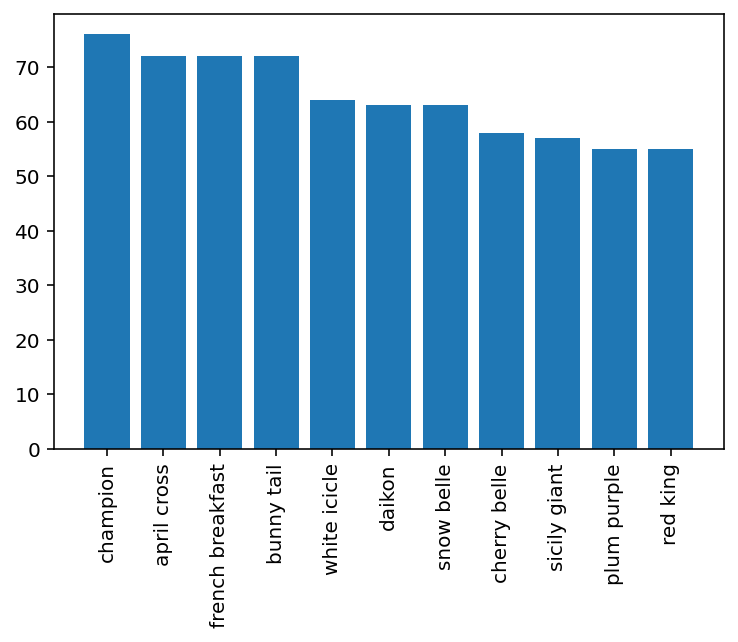

In [ ]:
#바차트
plt.bar(df['candidate'].value_counts().index,df['candidate'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x7fb39ab20250>,
 [Text(1.0378674305802391, 0.3644601439674481, 'champion'),
  Text(0.5986246155747552, 0.9228480750524306, 'april cross'),
  Text(-0.07082562170710878, 1.0977175097946656, 'french breakfast'),
  Text(-0.7122533248392505, 0.8382691699301802, 'bunny tail'),
  Text(-1.062412897501446, 0.2850944321143122, 'white icicle'),
  Text(-1.0501649965210194, -0.3273430617593839, 'daikon'),
  Text(-0.7159712298469366, -0.835095921455413, 'snow belle'),
  Text(-0.1872679067729857, -1.0839422175987354, 'cherry belle'),
  Text(0.3667651622145622, -1.0370551170433162, 'sicily giant'),
  Text(0.8173502757913033, -0.7361647415245319, 'plum purple'),
  Text(1.0673121586055259, -0.2661667824744726, 'red king')],
 [Text(0.5661095075892212, 0.19879644216406256, '10.7%'),
  Text(0.3265225175862301, 0.5033716773013257, '10.2%'),
  Text(-0.0386321572947866, 0.5987550053425448, '10.2%'),
  Text(-0.3885018135486821, 0.45723772905282545, '10.2%'),
  Text(-0.5794979440

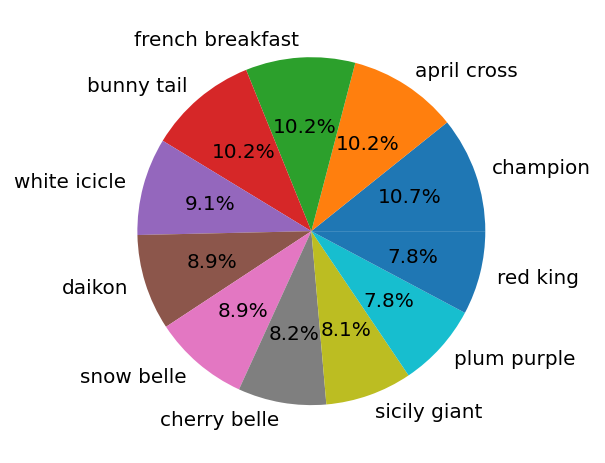

In [ ]:
#파이차트
val=df['candidate'].value_counts().values
labels = df['candidate'].value_counts().index
plt.pie(val,labels = labels,autopct='%1.1f%%')

# 퀴즈2
* 커피파일  
http://opentechschool.github.io/python-data-intro/files/coffee.csv
*  항공운항데이터  
https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
* 경로데이터
https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat

In [ ]:
df = pd.read_csv('http://opentechschool.github.io/python-data-intro/files/coffee.csv')
display(df.head())


,Coffee,Water,Milk,Icecream
0,Espresso,No,No,No
1,Long Black,Yes,No,No
2,Flat White,No,Yes,No
3,Cappuccino,No,Yes - Frothy,No
4,Affogato,No,No,Yes


In [ ]:
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat\
    -o ./data/airports.dat
!curl https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat\
    -o ./data/route.dat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1100k  100 1100k    0     0  3862k      0 --:--:-- --:--:-- --:--:-- 3876k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2321k  100 2321k    0     0  15.2M      0 --:--:-- --:--:-- --:--:-- 15.2M


In [ ]:
air = pd.read_csv('./data/airports.dat', header= None)
route = pd.read_csv('./data/route.dat',header=None)


In [ ]:
display(air.info())
display(airport.info())
display(air.describe())
display(air.head())
display(route.head())
display(route.info())
display(route.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7698 non-null   int64  
 1   1       7698 non-null   object 
 2   2       7649 non-null   object 
 3   3       7698 non-null   object 
 4   4       7698 non-null   object 
 5   5       7698 non-null   object 
 6   6       7698 non-null   float64
 7   7       7698 non-null   float64
 8   8       7698 non-null   int64  
 9   9       7698 non-null   object 
 10  10      7698 non-null   object 
 11  11      7698 non-null   object 
 12  12      7698 non-null   object 
 13  13      7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7698 non-null   int64  
 1   1       7698 non-null   object 
 2   2       7649 non-null   object 
 3   3       7698 non-null   object 
 4   4       7698 non-null   object 
 5   5       7698 non-null   object 
 6   6       7698 non-null   float64
 7   7       7698 non-null   float64
 8   8       7698 non-null   int64  
 9   9       7698 non-null   object 
 10  10      7698 non-null   object 
 11  11      7698 non-null   object 
 12  12      7698 non-null   object 
 13  13      7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+ KB


None

,0,6,7,8
count,7698.000000,7698.000000,7698.000000,7698.000000
mean,5170.950117,25.808442,-1.390546,1015.873344
std,3777.259930,28.404946,86.519162,1628.775132
min,1.000000,-90.000000,-179.876999,-1266.000000
25%,1993.250000,6.907983,-78.974699,63.000000
50%,4068.000000,34.085701,6.375653,352.000000
75%,7728.750000,47.239551,56.000599,1203.000000
max,14110.000000,89.500000,179.951004,14472.000000


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


,0,1,2,3,4,5,6,7,8
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       67663 non-null  object
 1   1       67663 non-null  object
 2   2       67663 non-null  object
 3   3       67663 non-null  object
 4   4       67663 non-null  object
 5   5       67663 non-null  object
 6   6       14597 non-null  object
 7   7       67663 non-null  int64 
 8   8       67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


None

,7
count,67663.000000
mean,0.000163
std,0.012749
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
Wdisplay(air[4].value_counts())
display(air[5].value_counts() )
display(route[2].value_counts())
display(route[4].value_counts())

\N     1626
IQM       1
MJM       1
NYA       1
CNW       1
       ... 
SAP       1
XCH       1
AGJ       1
TDG       1
BFW       1
Name: 4, Length: 6073, dtype: int64

CO00    1
KAUS    1
FAZR    1
DRRT    1
LFRT    1
       ..
FZIC    1
LTFB    1
CBA9    1
LSXB    1
KNCA    1
Name: 5, Length: 7698, dtype: int64

ATL    915
ORD    558
PEK    535
LHR    527
CDG    524
      ... 
VCT      1
LWN      1
GUC      1
ESC      1
BHB      1
Name: 2, Length: 3409, dtype: int64

ATL    911
ORD    550
PEK    534
LHR    524
CDG    517
      ... 
PJG      1
KAT      1
MAZ      1
MZL      1
CIZ      1
Name: 4, Length: 3418, dtype: int64